# Storytelling Challenge

The goal was to understand why people who got the vaccine have chosen to not get the booster, especially with the booster now being widely availble.

Through analyzing different maps and graphs I was able to come to the conclusion that the main reasons are dislike for the booster and laziness in getting the booster.

### Importing

In [2]:
import pandas as pd
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [3]:
pulse = pd.read_csv("../csv files/pulse2022_puf_46.csv")

### Cleaning Data For Maps

Each map required two steps
* First step was retrieving the data for each state from the original dataframe
* Second step was matching the states with their abbrevations to function with the geoJSON file

In [4]:
i = 1
vacc_state = {}
invalid = [3, 7, 11, 14, 43, 52]

while(i < 57):
    if(i not in invalid):
        j = 0
        didr = 0
        notr = 0
        cur_state = pulse[(pulse['EST_ST']==i)]
        cur_state.reset_index(inplace = True)
        while(j < len(cur_state)):
            if(cur_state.loc[j, "RECVDVACC"] == 1):
                didr += 1
            elif(cur_state.loc[j, "RECVDVACC"] == 2):
                notr += 1
            j += 1
        percent = didr / (didr + notr)
        vacc_state[i] = percent
    i += 1

######################################################################################    

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

i = 1
state = 0
invalid = [3, 7, 11, 14, 43, 52]
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", 
          "FL", "GA", "HI", "ID", "IL", "IN", "IA", 
          "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", 
          "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", 
          "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", 
          "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", 
          "WV", "WI", "WY"]
data = {'State': [], 'Percent': []}
vacc_data = pd.DataFrame(data=data)
while(i < 57):
    if(i not in invalid):
        cur_per = vacc_state.get(i)
        vacc_data = vacc_data.append({'State': states[state], 'Percent': cur_per}, ignore_index=True)
        state += 1
    i += 1

In [5]:
i = 1
boost_state = {}
invalid = [3, 7, 11, 14, 43, 52]

while(i < 57):
    if(i not in invalid):
        j = 0
        didu = 0
        notu = 0
        cur_state = pulse[(pulse['EST_ST']==i)]
        cur_state.reset_index(inplace = True)
        while(j < len(cur_state)):
            if(cur_state.loc[j, "BOOSTERRV"] == 1):
                didu += 1
            elif(cur_state.loc[j, "BOOSTERRV"] == 2):
                notu += 1
            j += 1
        percent = didu / (didu + notu)
        boost_state[i] = percent
    i += 1

###################################################################################### 

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

i = 1
state = 0
invalid = [3, 7, 11, 14, 43, 52]
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", 
          "FL", "GA", "HI", "ID", "IL", "IN", "IA", 
          "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", 
          "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", 
          "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", 
          "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", 
          "WV", "WI", "WY"]
data = {'State': [], 'Percent': []}
boost_data = pd.DataFrame(data=data)
while(i < 57):
    if(i not in invalid):
        cur_per = boost_state.get(i)
        boost_data = boost_data.append({'State': states[state], 'Percent': cur_per}, ignore_index=True)
        state += 1
    i += 1

In [6]:
i = 0
noboost = []

while(i < 50):
    vacc = vacc_data.loc[i, "Percent"]
    boost = boost_data.loc[i, "Percent"]
    noboost.append(vacc - boost)
    i += 1

######################################################################################    

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

i = 0
state = 0
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", 
          "FL", "GA", "HI", "ID", "IL", "IN", "IA", 
          "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", 
          "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", 
          "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", 
          "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", 
          "WV", "WI", "WY"]
data = {'State': [], 'Percent': []}
noboost_data = pd.DataFrame(data=data)
while(i < 50):
    cur_per = noboost[i]
    noboost_data = noboost_data.append({'State': states[state], 'Percent': cur_per}, ignore_index=True)
    state += 1
    i += 1

### Creating Maps

* Utilized geoJSON provided from Folium github

In [7]:
state_geo = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json'

map1 = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=vacc_data,
    columns=['State', 'Percent'],
    key_on='feature.id',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Vaccination Rate (%)'
).add_to(map1)

map2 = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=boost_data,
    columns=['State', 'Percent'],
    key_on='feature.id',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Booster Rate (%)'
).add_to(map2)

map3 = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=noboost_data,
    columns=['State', 'Percent'],
    key_on='feature.id',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Vaccination/Booster Difference (Difference of %)'
).add_to(map3)

### Displaying Maps

In [8]:
map1
# map1.save(outfile="../Maps/Vaccrate.html")

In [9]:
map2
# map2.save(outfile="../Maps/Boostrate.html")

In [10]:
map3
# map3.save(outfile="../Maps/Vaccboostdiff.html")

### Cleaning Code for State Booster Reasons

* 4 seperate segments were used for each state, with similar practices to the cleaning done for the maps

In [11]:
i = 0
cur_state = pulse[(pulse['EST_ST']==22)]
cur_state.reset_index(inplace = True)
data = {'State': [], 'Reason': []}
noboostLA = pd.DataFrame(data=data)

while(i < len(cur_state)):
    j = 1
    while(j < 10):
        if(cur_state.loc[i, f"WHYNOBSTR{j}"] == 1):
            noboostLA = noboostLA.append({'State': "LA", 'Reason': j}, ignore_index=True)
        j += 1
    i += 1
    
i = 0
cur_state = pulse[(pulse['EST_ST']==28)]
cur_state.reset_index(inplace = True)
data = {'State': [], 'Reason': []}
noboostMS = pd.DataFrame(data=data)

while(i < len(cur_state)):
    j = 1
    while(j < 10):
        if(cur_state.loc[i, f"WHYNOBSTR{j}"] == 1):
            noboostMS = noboostMS.append({'State': "LA", 'Reason': j}, ignore_index=True)
        j += 1
    i += 1
    
i = 0
cur_state = pulse[(pulse['EST_ST']==47)]
cur_state.reset_index(inplace = True)
data = {'State': [], 'Reason': []}
noboostTN = pd.DataFrame(data=data)

while(i < len(cur_state)):
    j = 1
    while(j < 10):
        if(cur_state.loc[i, f"WHYNOBSTR{j}"] == 1):
            noboostTN = noboostTN.append({'State': "LA", 'Reason': j}, ignore_index=True)
        j += 1
    i += 1
    
i = 0
cur_state = pulse[(pulse['EST_ST']==49)]
cur_state.reset_index(inplace = True)
data = {'State': [], 'Reason': []}
noboostUT = pd.DataFrame(data=data)

while(i < len(cur_state)):
    j = 1
    while(j < 10):
        if(cur_state.loc[i, f"WHYNOBSTR{j}"] == 1):
            noboostUT = noboostUT.append({'State': "LA", 'Reason': j}, ignore_index=True)
        j += 1
    i += 1

### Reason Graphs

* 4 graphs were created for the states and 1 for the overall

<Axes: title={'center': 'Louisiana'}, xlabel='Reason', ylabel='Num Responses'>

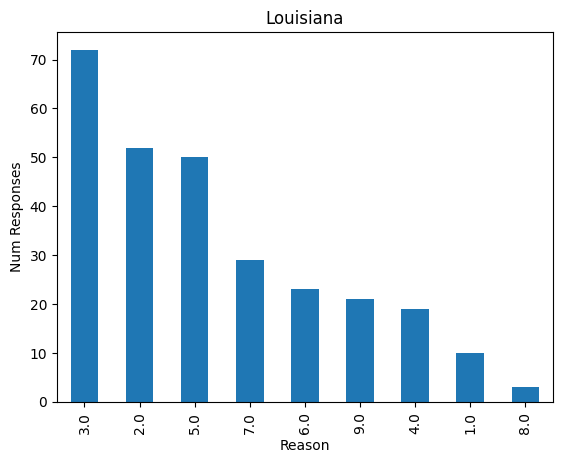

In [12]:
noboostLA["Reason"].value_counts().plot(kind="bar", title = "Louisiana", xlabel = "Reason", ylabel = "Num Responses")

<Axes: title={'center': 'Mississippi'}, xlabel='Reason', ylabel='Num Responses'>

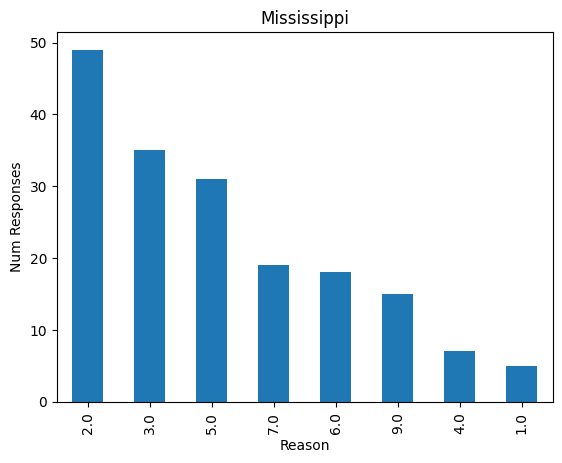

In [13]:
noboostMS["Reason"].value_counts().plot(kind="bar", title = "Mississippi", xlabel = "Reason", ylabel = "Num Responses")

<Axes: title={'center': 'Tennessee'}, xlabel='Reason', ylabel='Num Responses'>

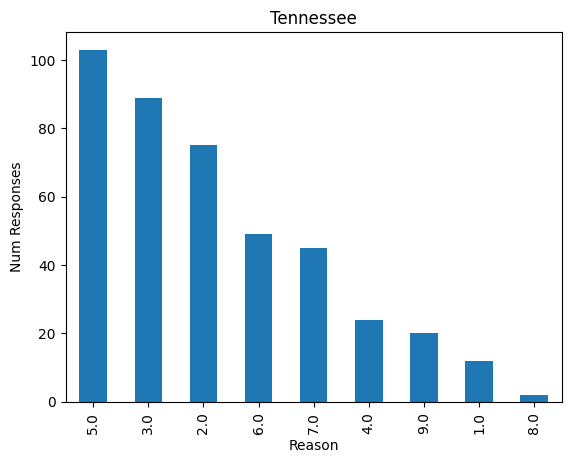

In [14]:
noboostTN["Reason"].value_counts().plot(kind="bar", title = "Tennessee", xlabel = "Reason", ylabel = "Num Responses")

<Axes: title={'center': 'Utah'}, xlabel='Reason', ylabel='Num Responses'>

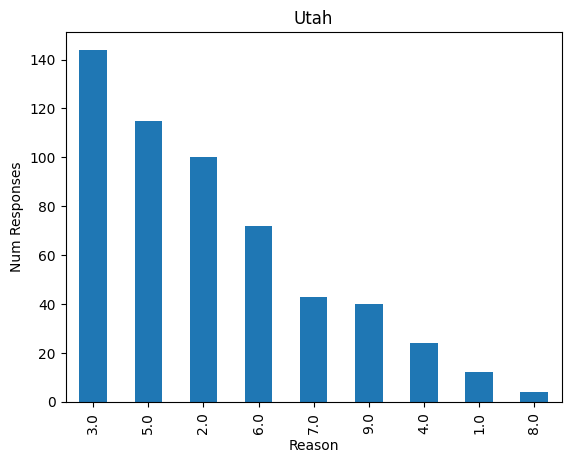

In [15]:
noboostUT["Reason"].value_counts().plot(kind="bar", title = "Utah", xlabel = "Reason", ylabel = "Num Responses")

<Axes: title={'center': 'Overall'}, xlabel='Reason', ylabel='Num Responses'>

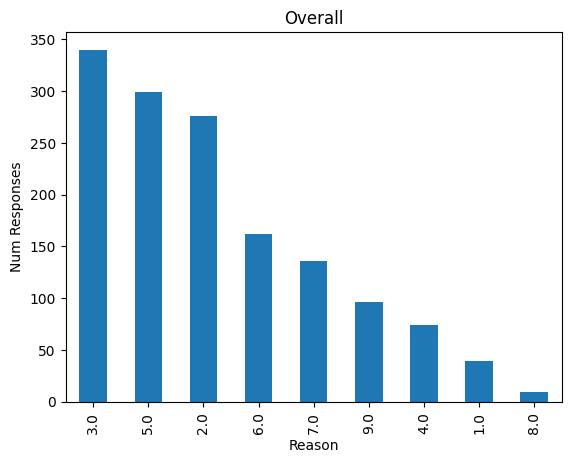

In [16]:
noboostOVR = pd.concat([noboostLA, noboostMS, noboostTN, noboostUT])
noboostOVR["Reason"].value_counts().plot(kind="bar", title = "Overall", xlabel = "Reason", ylabel = "Num Responses")

Value counts for easier interpretations

In [17]:
noboostOVR["Reason"].value_counts()

3.0    340
5.0    299
2.0    276
6.0    162
7.0    136
9.0     96
4.0     74
1.0     39
8.0      9
Name: Reason, dtype: int64